# Applications

In [2]:
import warnings, platform
from IPython.display import display, HTML

import matplotlib.pyplot as plt

In [3]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [4]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

## Package Load

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns

## Business and Marketing

### (1) RFM
- Recency: 가장 최근 상품 구입일에서 오늘까지 기간
- Frequency: 상품 구매 횟수
- Monetary value: 총 구매 금액
- Customer segmentation

A쇼핑은 RFM 기반의 고객세분화를 수행하고자 500명의 고객을 무작위로 샘플링 하여 Recency, Frequency, Monetary 세 가지 변수를 통한 군집분석을 진행하고자 한다.

In [6]:
shopping = pd.read_csv('./pythondata/data/Ashopping.csv', encoding='CP949')
data_temp = shopping.sample(n=500, random_state=111) 
x = data_temp[['Recency', 'Frequency', 'Monetary']]

In [7]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [8]:
### Hierarchy
cluster= linkage(x, method='average', metric='euclidean') 
print(cluster[490:])

[[969.         979.           2.43557142  72.        ]
 [978.         988.           2.60070576  33.        ]
 [984.         991.           2.78913055  40.        ]
 [981.         989.           3.05800305 374.        ]
 [986.         990.           3.11871825  81.        ]
 [161.         993.           3.55293738 375.        ]
 [994.         995.           3.67802103 456.        ]
 [987.         992.           3.97824721  44.        ]
 [996.         997.           6.01862823 500.        ]]


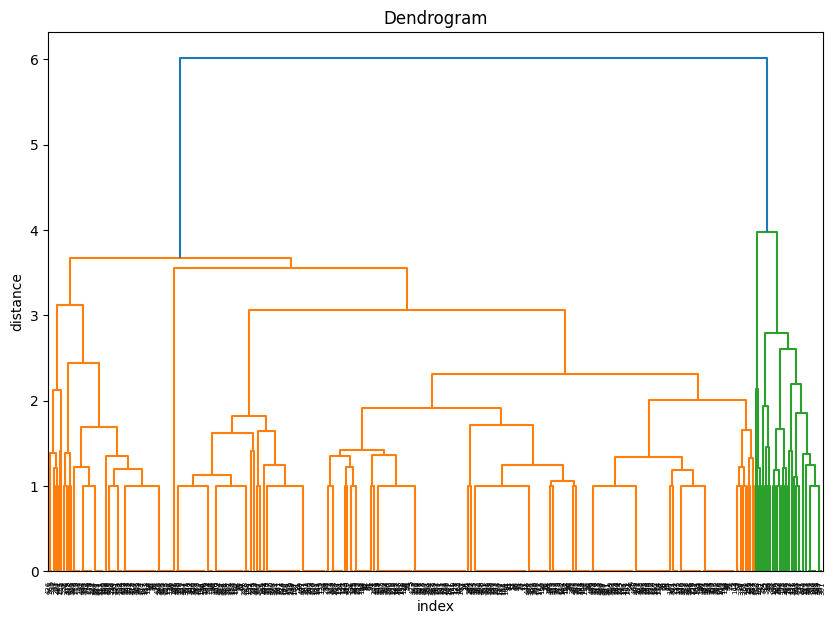

In [10]:
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(cluster)
plt.show()

In [12]:
from sklearn.cluster import KMeans

In [16]:
### K-means
model = KMeans(n_clusters=3, max_iter=20, random_state=19).fit(x)
x['cluster_id'] = model.labels_ 

# 군집별 고객 수 확인
clu1 = x[x.cluster_id==0]
clu2 = x[x.cluster_id==1]
clu3 = x[x.cluster_id==2]
print('군집1의 고객 수:', clu1.cluster_id.count())
print('군집2의 고객 수:', clu2.cluster_id.count())
print('군집3의 고객 수:', clu3.cluster_id.count())

# 군집별 평균 RFM 확인
print('군집1의 RFM평균:', clu1.Recency.mean(), clu1.Frequency.mean(), clu1.Monetary.mean())
print('군집2의 RFM평균:', clu2.Recency.mean(), clu2.Frequency.mean(), clu2.Monetary.mean())
print('군집3의 RFM평균:', clu3.Recency.mean(), clu3.Frequency.mean(), clu3.Monetary.mean())

군집1의 고객 수: 211
군집2의 고객 수: 242
군집3의 고객 수: 47
군집1의 RFM평균: 6.943127962085308 4.464454976303317 5.701421800947867
군집2의 RFM평균: 6.822314049586777 3.1859504132231407 2.9173553719008263
군집3의 RFM평균: 1.7234042553191489 3.0851063829787235 3.6595744680851063


In [469]:
### Advanced Case
retail_df = pd.read_excel(io='./data/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [470]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [471]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [472]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [473]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


In [474]:
# 주문 금액 컬럼 생성
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [475]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [476]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [477]:
### 주문번호 기준 데이터를 고객 기준 데이터로 변경
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {'InvoiceDate': 'max', 'InvoiceNo': 'count', 'sale_amount':'sum'}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)

# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'sale_amount':'Monetary'})
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [478]:
# Recency 계산
cust_df['Recency'] = datetime.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days + 1)
print('cust_df 로우와 컬럼 건수는 ', cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

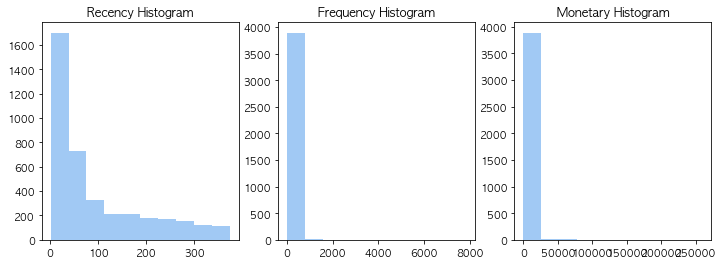

In [479]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [480]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [481]:
x_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
x_features_scaled = StandardScaler().fit_transform(x_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(x_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(x_features_scaled, labels)))

실루엣 스코어는 : 0.592


In [482]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

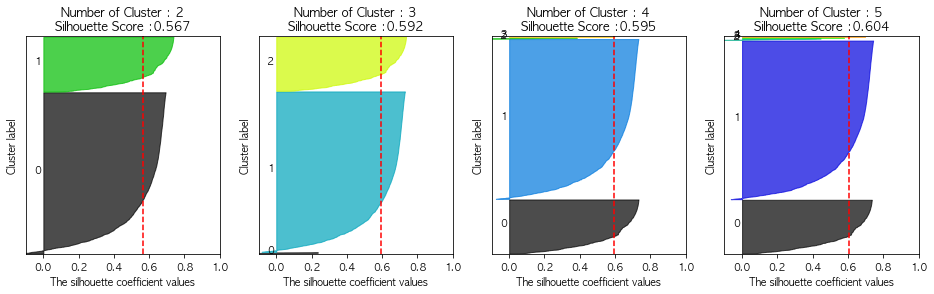

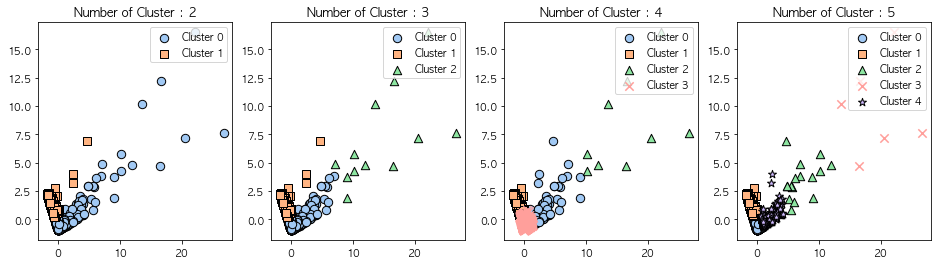

In [483]:
visualize_silhouette([2, 3, 4, 5], x_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], x_features_scaled)

In [484]:
### Log 변환을 통해 데이터 변환
# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
x_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
x_features_scaled = StandardScaler().fit_transform(x_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(x_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(x_features_scaled, labels)))

실루엣 스코어는 : 0.303


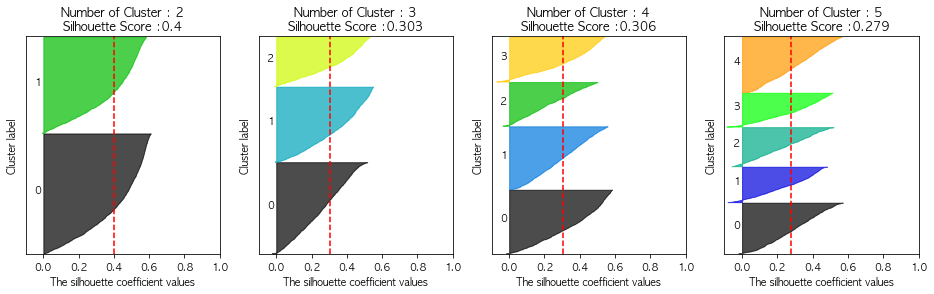

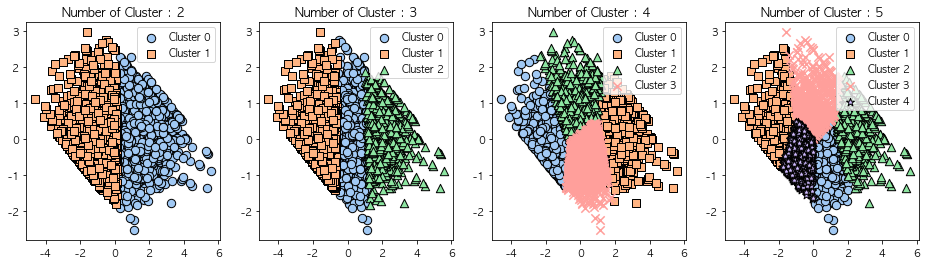

In [485]:
visualize_silhouette([2, 3, 4, 5], x_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], x_features_scaled)

### (2) Cohort Analysis
- 사용자 행동을 그룹으로 나눠 지표별로 수치화한 뒤 분석하는 기법

- 분석 주제
    - 첫 번째 구매행동 이후 몇 개월까지 구매행위가 지속되는가?
    - 구매주기는 대략적으로 얼마큼 되는가?
    - 첫 구매 날짜(브랜드 인입 시기)에 따른 최근 구매 패턴(구매, 비구매) 비교 등

- 상기 분석 목표에 따라서 변수를 설정하여야 하는데, 여기에서는 '첫구매'일로 설정함
- 구매일(OrderDate)을 YYYY-MM 형식으로 만들어줌

In [577]:
df = pd.read_excel("./data/relay-foods.xlsx", sheet_name = 'Purchase') # Purchase 
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [578]:
df['OrderPeriod'] = df.OrderDate.apply(lambda x: x.strftime('%Y-%m'))
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


In [579]:
# 각각 사용자의 첫 구매월을 추출하기위해 UserId를 index로 설정한 이후 groupby 함수를 사용하여 (기준 index level = 0) 'CohortGroup' 변수 추가
df = df.set_index('UserId')

# 고객 각각의 첫 구매기간 추출
df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df = df.reset_index()
df.head()

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [580]:
# 첫구매일(년월)와 구매 날짜(년월)를 기준으로 하여 고객 수, 주문 수, 총매출 합계를 계산합니다.
# CohortGroup & OrderPeriod
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

cohorts = grouped.agg({'UserId': pd.Series.nunique, # DISTINCT COUNT 
                       'OrderId': pd.Series.nunique,
                       'TotalCharges': np.sum}) # SUM 
                       
cohorts.rename(columns={'UserId': 'TotalUsers',
                        'OrderId': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeriod                                       
2009-01     2009-01              22           30      1850.255
            2009-02               8           25      1351.065
            2009-03              10           26      1357.360
            2009-04               9           28      1604.500
            2009-05              10           26      1575.625

In [581]:
# <년월 - 년월>의 패턴을 <년월 - 소요기간(월)>로 변환하여 보기 위함
# Label the CohortPeriod for each CohortGroup
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [582]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head(20)

TotalUsers  TotalOrders  TotalCharges  CohortPeriod
CohortGroup OrderPeriod                                                     
2009-01     2009-01              22           30     1850.2550             1
            2009-02               8           25     1351.0650             2
            2009-03              10           26     1357.3600             3
            2009-04               9           28     1604.5000             4
            2009-05              10           26     1575.6250             5
            2009-06               8           26     1384.8400             6
            2009-07               8           24     1750.8400             7
            2009-08               7           21     1426.5714             8
            2009-09               7           24     1964.2755             9
            2009-10               7           13      860.3292            10
            2009-11               7           21     1821.8153            11
            2009-12               8           22     2152.1165            12
            2010-01              11           25     2084.2236            13
            2010-02               7           19     2068.7771            14
            2010-03               6           12     1504.3325            15
2009-02     2009-02              15           15      666.3100             1
            2009-03               3            8      501.6100             2
            2009-04               5           10      968.7800             3
            2009-05               1            2       53.3600             4
            2009-06               4            9      758.5200             5

In [583]:
cohorts.reset_index(inplace=True)

In [584]:
# Retention 결과를 (%) 비율로 나타내기 위해 각각 첫 구매일(년월)에 따른 회원수를 구합니다.
# 2009-01 에 첫 구매한 회원수 22명 , 2월에 첫 구매한 회원수 15명
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2009-01    22
2009-02    15
2009-03    13
2009-04    39
2009-05    50
Name: TotalUsers, dtype: int64

In [585]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
2,8.0,3.0,4.0,13.0,13.0,15.0,23.0,11.0,15.0,17.0,32.0,17.0,50.0,19.0,NaN
3,10.0,5.0,5.0,10.0,12.0,9.0,13.0,9.0,14.0,12.0,26.0,18.0,26.0,NaN,NaN
4,9.0,1.0,4.0,13.0,5.0,6.0,10.0,7.0,8.0,13.0,29.0,7.0,NaN,NaN,NaN
5,10.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,13.0,NaN,NaN,NaN,NaN


In [586]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


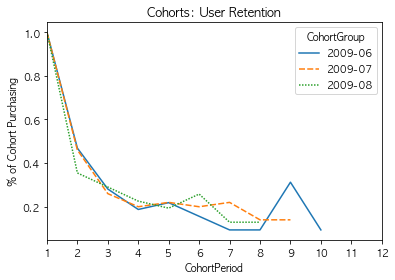

In [587]:
sns.lineplot(data=user_retention[['2009-06', '2009-07', '2009-08']])
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

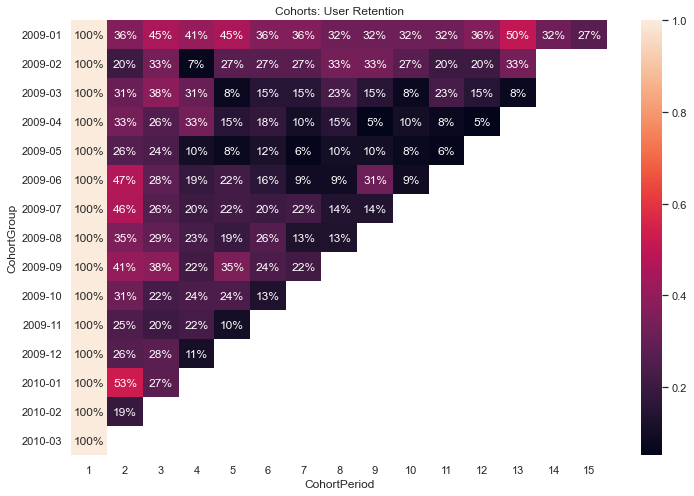

In [588]:
# 그래프는 각각 브랜드에 유입된 시기를 비교하여 첫구매 이후 고객들의 구매패턴을 나타낸 것입니다.
# 2009년 07월에 유입된 고객들의 패턴을 기준으로 살펴보면 첫 구매 이후 한 달 뒤 46%가 구매행동을 보였고 8개월이 지난 후에는 14%만이 구매행동을 보였습니다.
# 여기서 자세히 살펴보면 최근 기준으로 구매행동을 보인 고객들의 유입 날짜(년월)를 확인할 수 있습니다.
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

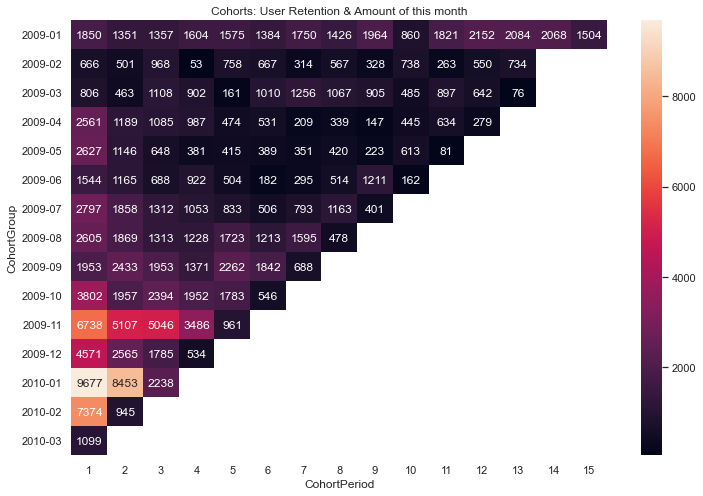

In [589]:
# 최근 발생한 매출의 회원들의 첫 구매일 분포
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention & Amount of this month')
sns.heatmap(cohorts['TotalCharges'].unstack(0).T.fillna(0).astype('int'), 
            mask=user_retention.T.isnull(), annot=True, fmt= '0');

### (3) Positioning Analysis
- 분석 대상을 좌표에 시각화 (Mapping)
- 자극점
    - 비교 대상 객체
    - 상품, 기업, 브랜드 등
- 속성
    - 평가 측정 변수
    - 이미지, 만족도, 품질 등
- 이상점: 자극점과 속성의 최적 위치
- MDS와 CA 사용. 수치형 데이터는 MDS, 명목 데이터는 CA

#### Multi-Dimensional Scaling

##### 단순 경쟁구조 분석
- A쇼핑의 포지셔닝 분석을 위해 6개의 주요 경쟁업체와 함께 단순 경쟁구조 분석을 수행함
- 자극점은 A사를 포함하여 총 7개의 쇼핑몰을, 속성은 이미지, 접근성, 서비스, 친절성, 편의시설, 인지도, 가격만족도 등 총 7개로 설정하여 설문 데이터 수집함

In [7]:
df = pd.read_csv('./pythondata/data/MDS1.csv', encoding='CP949') 
df

,shop,이미지,접근성,서비스,친절성,편의시설,인지도,가격만족도
0,A쇼핑,3.4,4.1,8.1,7.8,6.4,7.8,7.7
1,B쇼핑,4.7,2.8,7.6,6.2,5.4,8.9,6.8
2,C쇼핑,8.1,3.1,7.5,2.4,2.6,5.5,6.7
3,D쇼핑,7.9,7.5,2.3,3.8,8.4,1.6,7.8
4,E쇼핑,4.2,2.6,4.9,7.0,2.7,8.5,5.8
5,F쇼핑,7.6,8.3,3.0,2.5,8.7,2.5,6.2
6,G쇼핑,7.1,3.9,8.2,2.5,3.8,9.4,5.1


In [8]:
from sklearn.manifold import MDS

In [9]:
### MDS 분석 (차원 좌표 값 계산)
df1 = df.loc[:, '이미지':'가격만족도']
clf = MDS(n_components=2, random_state=123).fit(df1)
x_mds = clf.fit_transform(df1)
x_mds

array([[-5.12747416, -0.46862067],
       [-3.25268823,  1.50430496],
       [ 3.52362088,  2.80304347],
       [ 2.97433754, -7.052197  ],
       [-3.84248425,  4.10485347],
       [ 4.66327843, -5.74998855],
       [ 1.06140978,  4.85860431]])

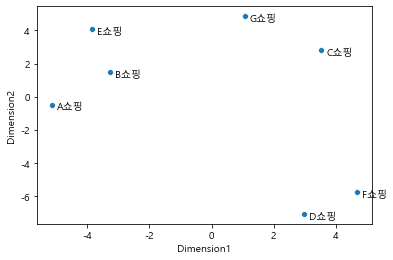

In [10]:
labels = df.shop
for label, x_count, y_count in zip(labels, x_mds[:, 0], x_mds[:, 1]):
    plt.annotate(label,
                xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5) )
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
sns.scatterplot(x=x_mds[:, 0], y=x_mds[:, 1])

##### 속성-경쟁구조 분석
- 쇼핑몰의 경쟁구조를 보다 정확하게 판단하기 위해서는 속성 역시 포지셔닝 맵에 표현해야 함

In [11]:
import statsmodels.formula.api as smf

In [12]:
df1 = (df1 - df1.min()) / (df1.max() - df1.min()) #정규화 (요소값–최소값)/(최대값-최소값)

# 차원 좌표 값 계산
clf = MDS(n_components=2, random_state=123).fit(df1)
x_mds = clf.fit_transform(df1) 

# 속성 차원 좌표 값 계산
df1['차원1'] = x_mds[:, 0]
df1['차원2'] = x_mds[:, 1]

model = list()
model.append(smf.ols(formula = '이미지 ~ 차원1+차원2', data=df1).fit())
model.append(smf.ols(formula = '접근성 ~ 차원1+차원2', data=df1).fit())
model.append(smf.ols(formula = '서비스 ~ 차원1+차원2', data=df1).fit())
model.append(smf.ols(formula = '친절성 ~ 차원1+차원2', data=df1).fit())
model.append(smf.ols(formula = '편의시설 ~ 차원1+차원2', data=df1).fit())
model.append(smf.ols(formula = '인지도 ~ 차원1+차원2', data=df1).fit())
model.append(smf.ols(formula = '가격만족도 ~ 차원1+차원2', data=df1).fit())

attribs = []
for i in range(0, 7):
   attribs.append([model[i].params[1], model[i].params[2]])
    
x_mds_arrtib = np.hstack([x_mds, np.array(attribs)])
x_mds_arrtib

array([[-1.03202434, -0.00641877,  0.54559765, -0.10043696],
       [-0.53757021,  0.28266513,  0.12883623, -0.42074909],
       [ 0.71120717,  0.32238053, -0.06935846,  0.37280673],
       [ 0.19723554, -1.25906064, -0.61440613,  0.00507243],
       [-0.51913327,  0.83498409, -0.1219796 , -0.48451721],
       [ 0.69997592, -0.99534218, -0.17062737,  0.41435935],
       [ 0.4803092 ,  0.82079184, -0.29692794, -0.32744816]])

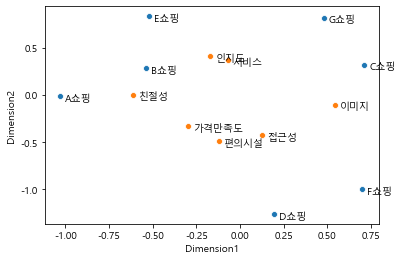

In [13]:
#3. 속성-경쟁구조 시각화
for label, x_count, y_count in zip(labels, x_mds_arrtib[:, 0], x_mds_arrtib[:, 1]):
    plt.annotate(label,
                xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5))
    
labels2 = df1.columns
for label, x_count, y_count in zip(labels2, x_mds_arrtib[:, 2], x_mds_arrtib[:, 3]):
    plt.annotate(label,
                xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5))
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
sns.scatterplot(x=x_mds_arrtib[:,0], y=x_mds_arrtib[:,1]) #자극점 좌표 그래프
sns.scatterplot(x=x_mds_arrtib[:,2], y=x_mds_arrtib[:,3]) #속성 좌표 그래프
plt.show()

##### 이상점-경쟁구조 분석
기업간의 경쟁구조에 고객들의 선호위치도 함께 표현해줄 수 있는 이상점-경쟁구조 분석을 실시함

In [14]:
df1 = pd.read_csv('./pythondata/data/MDS1.csv', encoding='CP949')
df3 = pd.read_csv('./pythondata/data/MDS3.csv', encoding='CP949') 

clf = MDS(n_components=2, random_state=123)
x_mds1 = clf.fit_transform(df1.loc[:, '이미지':'가격만족도']) # 자극점
x_mds3 = clf.fit_transform(df3.loc[:, 'A쇼핑':'G쇼핑']) # 이상점

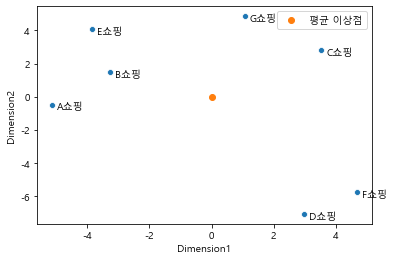

In [15]:
labels = df1.shop
for label, x_count, y_count in zip(labels, x_mds1[:,0], x_mds1[:,1]):
    plt.annotate(label,
                xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5)) 
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
sns.scatterplot(x=x_mds1[:,0], y=x_mds1[:,1])
# plt.scatter(x_mds3[:,0], x_mds3[:,1], label='이상점')
plt.scatter(x=x_mds3[:, 0].mean(), y=x_mds3[:,1].mean(), label='평균 이상점')
plt.legend(loc='upper right')
plt.show()

#### Correspondence Analysis

##### 단순 상응분석
슬로프 난이도를 기준으로 국내 각 리조트의 경쟁관계 혹은 포지셔닝을 살펴보는 단순 상응분석을 진행함

In [16]:
cor = pd.read_csv('./pythondata/data/Correspondence.csv', encoding='CP949') 
x = pd.crosstab(cor.resort, cor.slope, margins=False)
x

slope,Slope-H,Slope-L,Slope-M
resort,,,
대명,3,5,2
리솜,3,4,3
무주,2,6,2
용평,4,1,5
한화,5,2,3


In [17]:
import prince

In [18]:
# 차원 좌표 값 계산
ca = prince.CA(n_components=2).fit(x)
print('리조트 기준 차원좌표\n', ca.row_coordinates(x))
print('\n슬로프 기준 차원좌표\n', ca.column_coordinates(x))

리조트 기준 차원좌표
            0         1
대명 -0.297192  0.064504
리솜 -0.079668 -0.052946
무주 -0.496362 -0.067862
용평  0.554549 -0.155482
한화  0.318672  0.211785

슬로프 기준 차원좌표
                 0         1
Slope-H  0.256394  0.155651
Slope-L -0.515052 -0.012403
Slope-M  0.327482 -0.161521


In [19]:
### row coordinates
coords_r = ca.row_coordinates(x)
coords_r.columns = ['x', 'y']
coords_r

,x,y
대명,-0.297192,0.064504
리솜,-0.079668,-0.052946
무주,-0.496362,-0.067862
용평,0.554549,-0.155482
한화,0.318672,0.211785


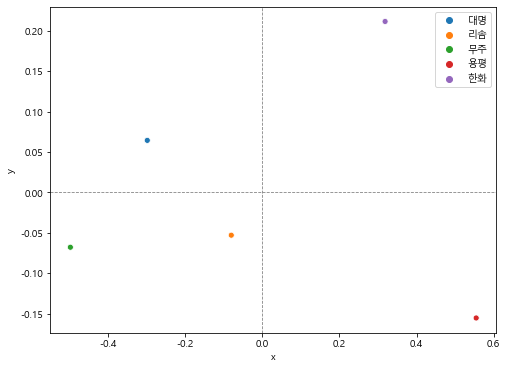

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords_r, hue=coords_r.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

##### 다중 상응분석
- 리조트 간의 경쟁관계를 슬로프 수준뿐만 아니라 교통편의성, 숙박편의성, 기타편의성 등 다른 요인을 동시에 고려하여 리조트 간의 포지셔닝을 진행함

In [21]:
x = cor.loc[1:]

# 차원 좌표 값 계산
mca = prince.MCA(n_components=2).fit(x)
print('\n각 변수별 차원좌표\n', mca.column_coordinates(x))


각 변수별 차원좌표
                           0         1
id                -0.106029 -0.031704
resort_대명          3.759677 -0.324288
resort_리솜         -0.430299 -0.189239
resort_무주         -0.359005 -0.487529
resort_용평         -0.122228  0.185999
resort_한화          0.229443  1.590454
slope_Slope-H      0.386113  1.190127
slope_Slope-L      0.913437 -0.826615
slope_Slope-M      0.293101  0.261021
traffic_Traffic-H  1.050188 -0.833374
traffic_Traffic-L -0.397572  0.073834
traffic_Traffic-M  0.936579  0.637687
lodging_Lodging-H  0.717127  0.517144
lodging_Lodging-L  0.040770 -0.000636
lodging_Lodging-M  0.829479 -0.010362
etc_Etc-H         -0.366127  0.556104
etc_Etc-L          0.736617  0.883005
etc_Etc-M          0.986981 -0.590294


In [22]:
### 차원 좌표
coords = mca.column_coordinates(x)
coords.columns = ['x', 'y']
coords

,x,y
id,-0.106029,-0.031704
resort_대명,3.759677,-0.324288
resort_리솜,-0.430299,-0.189239
resort_무주,-0.359005,-0.487529
resort_용평,-0.122228,0.185999
resort_한화,0.229443,1.590454
slope_Slope-H,0.386113,1.190127
slope_Slope-L,0.913437,-0.826615
slope_Slope-M,0.293101,0.261021
traffic_Traffic-H,1.050188,-0.833374


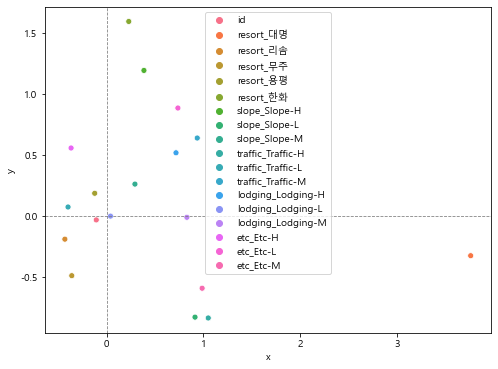

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords, hue=coords.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

### (4) Conjoint Analysis
- 주요 속성들로 구성된 대안을 선택하여 최적의 상품구성 도출
- 선택한 대안을 통해 상품의 속성에 대한 소비자의 효용가치 추정
- 분석 모형
    - 벡터 모형
        - 속성의 수준이 수치형인 경우의 선형 모형
        - 효용에 미치는 영향이 속성의 값에 비례함
    - 이상점 모형
        - 모든 속성에는 가장 선호되는 이상점이 존재함을 가정함
        - 특별한 이상점을 중심으로 2차 곡선의 형태
    - 부분가치함수 모형
        - 속성이 명목형인 경우
        - 각 속성 수준으로 부분효용 가치를 추정하여 전체 효용 및 선호도 도출
- 대안 프로필 생성
    - 직교배열법: 임의로 두 개의 속성을 선택했을 때, 이들의 조합이 서로 독립인 관계를 나타내도록 대안 선택하는 방법으로 속성 수준 제한이 없음
    - 라틴방격법: 열과 행을 모두 고려하여, 어떠한 결합도 중복이 발생되지 않도록 설계함. 적은 수의 속성으로 더 나은 선택대안을 추출할 수 있으나, 모든 속성이 같은 수준의 수를 가져야 함
- 대안 선호도 조사
    - 서열순위법: 모든 선택 대안을 한 번에 제시하고, 소비자는 선호도를 순위로 평가함. 데이터 수집과 분석이 용이하나, 비교 대상이 많을수록 신뢰성 저하
    - 쌍체비교법: 한 번에 두 가지 대안을 제시하여 상대적인 선호도 수집함. 정확한 선호도와 중요도를 평가할 수 있지만, 데이터 수집이 용이하지 않고 데이터 간 논리적 모순이 있을 수 있음

In [6]:
df = pd.read_csv('./pythondata/data/conjoint.csv', encoding='CP949')
df

,NO,데이터양,데이터속도,통화량,전체평균,응답자1,응답자2,응답자3,응답자4,응답자5,...,응답자41,응답자42,응답자43,응답자44,응답자45,응답자46,응답자47,응답자48,응답자49,응답자50
0,1,500MB,상,180분,5.02,8,8,8,5,3,...,5,3,1,7,1,2,8,8,8,5
1,2,500MB,중,150분,4.06,2,5,4,4,5,...,4,5,2,8,2,4,2,5,4,4
2,3,500MB,하,120분,4.80,1,2,3,6,7,...,6,7,3,9,3,9,1,2,3,6
3,4,1GB,상,150분,4.72,7,7,7,3,6,...,3,6,4,5,5,1,7,7,7,3
4,5,1GB,중,120분,5.10,9,4,6,2,8,...,2,8,5,6,6,6,9,4,6,2
5,6,1GB,하,180분,2.94,3,1,2,1,1,...,1,1,6,4,4,8,3,1,2,1
6,7,2GB,상,120분,7.38,6,9,9,9,9,...,9,9,7,3,9,3,6,9,9,9
7,8,2GB,중,180분,5.72,5,6,5,8,2,...,8,2,8,1,7,5,5,6,5,8
8,9,2GB,하,150분,5.26,4,3,1,7,4,...,7,4,9,2,8,7,4,3,1,7


In [7]:
import statsmodels.api as sm
from sympy import *

In [13]:
### 속성수준 더미변수생성 및 독립변수 객체 생성
con_df = pd.get_dummies(df,columns=['데이터양','데이터속도','통화량'], drop_first=False)
con_df['intercept'] = 1.0
X = con_df[['intercept', '데이터양_1GB', '데이터양_2GB', '데이터속도_중', '데이터속도_상', '통화량_150분', '통화량_180분']]

In [14]:
### 개별 응답자의 속성수준 효용가치 계산하기
res = []
intercept = []
for i in range(50):
    y = con_df[con_df.columns[2:52][i]]
    LR1 = sm.OLS(y, X).fit()

    # 연립방정식을 이용한 응답자의 속성수준별 효용가치 계산 
    x, y, z = symbols('a_1 a_2 a_3')
    a1 = solve([Eq(x-z,LR1.params[1]), Eq(y-z,LR1.params[2]), Eq(x+y+z, 0)], [x, y, z])
    x, y, z = symbols('b_1 b_2 b_3')
    b1 = solve([Eq(x-z,LR1.params[3]), Eq(y-z,LR1.params[4]), Eq(x+y+z, 0)], [x, y, z])
    x, y, z = symbols('c_1 c_2 c_3')
    c1 = solve([Eq(x-z,LR1.params[5]), Eq(y-z,LR1.params[6]), Eq(x+y+z, 0)], [x, y, z])

    # 속성수준 효용가치 병합
    a_1 = list(a1.values())
    b_1 = list(b1.values())
    c_1 = list(c1.values())
    a_1.extend(b_1)
    a_1.extend(c_1)
    res.append(a_1)
    d_1 = LR1.params[0]
    intercept.append(d_1)

# 데이터프레임으로 전환 후 출력 
result = pd.DataFrame(res)
result.columns = ['데이터양_1GB', '데이터양_2GB', '데이터양_500MB', '데이터속도_중','데이터속도_상', '데이터속도_하', '통화량_150분', '통화량_180분','통화량_120분']
print(result.shape)
result.head()

(50, 9)


,데이터양_1GB,데이터양_2GB,데이터양_500MB,데이터속도_중,데이터속도_상,데이터속도_하,통화량_150분,통화량_180분,통화량_120분
0,1.33333333333333,0.0,-1.33333333333333,0.333333333333333,2.00000000000000,-2.33333333333333,-0.666666666666666,0.333333333333332,0.333333333333334
1,-1.00000000000000,1.00000000000000,0.0,0.0,3.00000000000000,-3.00000000000000,-5.27342846908757e-15,-2.99786396225177e-15,8.27129243133933e-15
2,1.00520700520983e-16,5.04851162052089e-16,-6.05371862573071e-16,0.0,3.00000000000000,-3.00000000000000,-1.00000000000000,0.0,1.00000000000000
3,-3.00000000000000,3.00000000000000,0.0,-0.333333333333325,0.666666666666663,-0.333333333333337,-0.333333333333333,-0.333333333333333,0.666666666666667
4,-4.86095617616191e-16,1.68633774082080e-15,-1.20024212320461e-15,0.0,1.00000000000000,-1.00000000000000,0.0,-3.00000000000000,3.00000000000000


In [30]:
### 대안별 더미변수 상태 행렬 생성
con_df2 = con_df[['데이터양_1GB', '데이터양_2GB', '데이터양_500MB', '데이터속도_중','데이터속도_상', '데이터속도_하', '통화량_150분', '통화량_180분','통화량_120분']]

#3. 대안별 응답자들의 효용가치 계산
alt1 = []
for i in range(9):
    alt1.append(con_df2.loc[i])
alt2 = []
for i in range(9):
    for k in range(50):
        alt2.append(np.dot(alt1[i], result.loc[k]))

### 개별응답자의 대안별 효용가치 데이터프레임 생성
cust_utility = []
for i in range(0, 401, 50):
    cust_utility.append(alt2[i:i+50])
cust_utility = pd.DataFrame(cust_utility).T
cust_utility.columns = ['대안1', '대안2', '대안3', '대안4', '대안5', '대안6', '대안7', '대안8', '대안9']
cust_utility = cust_utility + np.array(intercept).mean()    
print(cust_utility.shape)
cust_utility.head()

(50, 9)


,대안1,대안2,대안3,대안4,대안5,대안6,대안7,대안8,대안9
0,5.72000000000000,3.05333333333333,1.38666666666667,7.38666666666667,6.72000000000000,4.05333333333333,7.05333333333333,5.38666666666666,1.72000000000000
1,7.72000000000000,4.71999999999999,1.72000000000001,6.71999999999999,3.72000000000001,0.719999999999997,8.72000000000001,5.72000000000000,2.71999999999999
2,7.72000000000000,3.72000000000000,2.72000000000000,6.72000000000000,5.72000000000000,1.72000000000000,8.72000000000000,4.72000000000000,0.720000000000000
3,5.05333333333333,4.05333333333334,5.05333333333333,2.05333333333333,2.05333333333334,1.05333333333333,9.05333333333333,7.05333333333334,7.05333333333333
4,2.72000000000000,4.72000000000000,6.72000000000000,5.72000000000000,7.72000000000000,0.720000000000000,8.72000000000000,1.72000000000000,3.72000000000000


In [31]:
### 대안별 평균 효용가치 계산
alt_mean = pd.DataFrame(cust_utility.mean(), columns=['효용가치'])
alt_mean['Rank'] = alt_mean['효용가치'].rank(ascending=False)
alt_mean.sort_values(by=['Rank'],ascending=True)

,효용가치,Rank
대안7,7.306667,1.0
대안8,5.360000,2.0
대안9,4.853333,3.0
대안5,4.693333,4.0
대안1,4.613333,5.0
대안3,4.440000,6.0
대안4,4.360000,7.0
대안2,3.986667,8.0
대안6,2.866667,9.0


In [32]:
### 속성별 중요도 및 효용가치 계산
a_dif = max(result.mean()[0:3]) - min(result.mean()[0:3])
b_dif = max(result.mean()[3:6]) - min(result.mean()[3:6])
c_dif = max(result.mean()[6:9]) - min(result.mean()[6:9])
print('\n데이터양 중요도 :', round(a_dif/(a_dif+b_dif+c_dif)*100, 2))
print('데이터속도 중요도 :', round(b_dif/(a_dif+b_dif+c_dif)*100, 2))
print('통화량 중요도 :', round(c_dif/(a_dif+b_dif+c_dif)*100, 2))

print('\n데이터양 효용가치(1GB, 2GB, 500MB):\n', result.mean()[0:3])
print('\n데이터속도 효용가치(중, 상, 하):\n', result.mean()[3:6])
print('\n통화량 효용가치(150분, 180분, 120분):\n',result.mean()[6:9])


데이터양 중요도 : 42.04
데이터속도 중요도 : 30.93
통화량 중요도 : 27.03

데이터양 효용가치(1GB, 2GB, 500MB):
 데이터양_1GB     -0.746667
데이터양_2GB      1.120000
데이터양_500MB   -0.373333
dtype: float64

데이터속도 효용가치(중, 상, 하):
 데이터속도_중   -0.040000
데이터속도_상    0.706667
데이터속도_하   -0.666667
dtype: float64

통화량 효용가치(150분, 180분, 120분):
 통화량_150분   -0.32
통화량_180분   -0.44
통화량_120분    0.76
dtype: float64


##### 가상의 시장점유율 예측
- 최대선호 모형: 선택한다/선택하지 않는다의 이분형 함수로, 가장 큰 효용을 주는 대안을 반드시 선택한다고 가정함 (대안의 효용을 가장 크게 느끼는 소비자 수/전체 소비자 수)
- 선택확률 모형: 다른 대안을 선택할 확률도 존재한다고, 각 대안을 선택할 확률읠 합은 1이라고 가정함 (대안을 선택할 확률의 합/전체 소비자 수)

In [34]:
### 9가지 대안에 대한 개별응답자의 최대선호 계산
pre1 = []
for i in range(50):
    pre1.append(np.where(cust_utility.loc[i].values == cust_utility.loc[i].max(), 1, 0))

MAX = pd.DataFrame(pre1)
MAX.columns = cust_utility.columns
MAX.head()

,대안1,대안2,대안3,대안4,대안5,대안6,대안7,대안8,대안9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [35]:
### 최대선호 모형을 이용한 시장점유율 예측
pre2 = []
for i in range(9):
    MAX_sum1 = MAX.iloc[:, i].sum()
    pre2.append(MAX_sum1)

prefer = pd.DataFrame(pre2).T
prefer.columns=cust_utility.columns
prefer/50*100

,대안1,대안2,대안3,대안4,대안5,대안6,대안7,대안8,대안9
0,4.0,0.0,16.0,10.0,0.0,0.0,58.0,0.0,12.0


In [36]:
### 개별응답자의 9가지 선택 대안에 대한 선택확률
pro1 = []
for i in range(50):
    pro1.append(cust_utility.loc[i]/cust_utility.loc[i].sum())
    
select = round(pd.DataFrame(pro1).astype(float), 3) 
select.columns = cust_utility.columns
select.head()

,대안1,대안2,대안3,대안4,대안5,대안6,대안7,대안8,대안9
0,0.135,0.072,0.033,0.174,0.158,0.095,0.166,0.127,0.040
1,0.182,0.111,0.040,0.158,0.088,0.017,0.205,0.135,0.064
2,0.182,0.088,0.064,0.158,0.135,0.040,0.205,0.111,0.017
3,0.119,0.095,0.119,0.048,0.048,0.025,0.213,0.166,0.166
4,0.064,0.111,0.158,0.135,0.182,0.017,0.205,0.040,0.088


In [37]:
### 9가지 선택 대안에 대한 개별 고객들의 시장점유율
pro2 = []	
for i in range(9):
    pro2.append(select.iloc[:,i].sum())

select2 = round(pd.DataFrame(pro2).astype(float).T, 3)
select2.columns = cust_utility.columns
select2/50*100

,대안1,대안2,대안3,대안4,대안5,대안6,대안7,대안8,대안9
0,10.864,9.376,10.444,10.26,11.054,6.758,17.186,12.618,11.418


### (5) A/B Test
- 두 그룹 비교
- 실험군과 대조군(Treatment & Control), 임의화 (다른 요소의 영향을 막기 위해 처리 적용 대상 랜덤 결정)
- T-test, Chi-sq test, Mann-whitney 등을 이용
- Multi-armed bandit
    - 전통적인 A/B test가 어려운 경우
        - 표본의 크기가 충분하지 않은 경우
        - 실험이 끝나기 전에, 이미 얻은 결과들을 이용하는 경우
        - 추가적으로 들어오는 데이터를 바탕으로 다른 것 시도
    - Epsilon-greedy algorithm
        - 0~1 사이의 난수 생성
        - 난수가 0과 Epsilon 사이이면, 동전 뒤집기 (50/50) 시행
        - 앞면이면 제안 A, 뒷면이면 제안 B
        - 난수가 Epsilon보다 크면, 지금까지 가장 좋은 결과를 보인 제안 표시
    - Thompson's sampling
        - 표본을 추출하여, 최고의 손잡이를 선택할 확률 최대화
        - Beta distribution (Bayes 사전 분포) 사용

#### Tranditional A/B Test

In [38]:
import scipy.stats as stats

In [39]:
### 디자인 시안 A,B에 따른 유저의 체류 시간 테스트하기
design_A = [16.4, 12.6, 17.5, 18.8, 12.1, 13.2, 14.5, 12.4, 17.5, 25.4, 9.3, 10.4]
design_B = [12.1, 11.8, 14.7, 13.1, 13.8, 10.1, 9.1, 13.5, 11.2, 13.7]

# 검정 시행
stats.ttest_ind(design_A, design_B, equal_var=False)

Ttest_indResult(statistic=1.933374622222914, pvalue=0.07227304704557012)

In [42]:
### 디자인 시안 A,B에 따른 유저의 전환율(클릭) 차이 테스트하기
a_click = 13
total_a = 244
b_click = 23
total_b = 287

click = [a_click, b_click] # A와 B의 클릭한 유저 수
no_click = [total_a - a_click, total_b - b_click]  # A와 B의 클릭 안 한 유저 수
cont_table = pd.DataFrame([click, no_click], columns=['A', 'B'], index=['click', 'no_click'])
chi2, p_val, d_f, expected = stats.chi2_contingency([click, no_click])

print("카이제곱 통계량 :", format(chi2, '.5f'))
print("p-value :", format(p_val, '.5f'))

카이제곱 통계량 : 1.11053
p-value : 0.29197


#### Test Power
- Power: 1-beta(제 2종 오류). 틀린 귀무가설에 대하여 귀무가설을 기각하는 비율
- Effect Size: 두 변수 사이 연관성 정도. 연구되는 현상이 실제로 모집단에 존재하는 정도
- Cohen's d
-  작은 효과는 0.2 정도, 중간 크기 효과는 0.5 정도이며, 큰 효과는 0.8 정

In [210]:
from statsmodels.stats import power

In [211]:
### Test power
# 일정 수준 이상의 power를 얻기 위한 표본 수 계산
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011) # p1, p2
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger') # 단측 검정
print('Sample Size: %.3f' % result)

Sample Size: 116602.393


In [212]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408


In [ ]:
효과크기(effect size)는 연구되는 현상이 실제로 모집단에 존재하는 정도

## Recommendations
- Content based filtering: 사용자가 특정한 아이템을 선호하는 경우, 비슷한 콘텐츠의 다른 아이템을 추천하는 것
- Collaborative filtering: 평점 정보나, 상품 구매 이력과 같은 사용자 행동(User Behavior) 기반 추천
    - NN filtering: 사용자 기반과 아이템 기반으로 구분
        - 사용자 기반: 특정 사용자와 유사한 다른 사용자를 Top-N으로 선정, Top-N이 좋아하는 아이템 추천
        - 아이템 기반: 사용자들의 아이템 선호 평가 척도가 유사한 아이템 추천 (사용자 기반보다 성능 좋음)
    - Latent Factor filtering: 행렬 분해를 이용한 방법. 사용자-아이템 행렬의 잠재 요인 추출 

### (1) Content based filtering

In [6]:
movies =pd.read_csv('./data/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
print(movies.shape)
movies.head(1)

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [7]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count','popularity', 'keywords', 'overview']]

pd.set_option('max_colwidth', 100)
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


In [8]:
from ast import literal_eval

In [9]:
movies_df['genres'] = movies_df['genres'].apply(literal_eval) # 문자열을 해석해서 객체로 반환
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

movies_df['genres'] = movies_df['genres'].apply(lambda x: [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: [y['name'] for y in x])
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환. 
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0.0, ngram_range=(1, 2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

# 장르 유사도 계산 -> 장르 기반 콘텐츠 필터링
genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])

(4803, 276)
(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]
[[   0 3494  813 ... 3038 3037 2401]]


In [14]:
movies_df[['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


In [15]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C:',round(C, 3), 'm:',round(m, 3))

C: 6.092 m: 370.2


In [18]:
# 가중 평점 계산
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ((v/(v+m)) * R) + ((m/(m+v)) * C) 

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1) 
movies_df[['title', 'vote_average', 'weighted_vote', 'vote_count']].sort_values('weighted_vote', ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


In [20]:
top_n = 10
title_movie = movies_df[movies_df['title']=='The Godfather']
title_index = title_movie.index.values
    
# top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 
similar_indexes = genre_sim_sorted_ind[title_index, :(top_n*2)]
similar_indexes = similar_indexes.reshape(-1)
# 기준 영화 index는 제외
similar_indexes = similar_indexes[similar_indexes != title_index]
    
# top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
similar_movies = movies_df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427


### (2) NN-Collaborative filtering

In [21]:
### Movie rating data
movies = pd.read_csv('./data/ml-latest-small/movies.csv')
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [22]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

# NaN 값을 모두 0 으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
### 영화의 유사도 산출
item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T) # 코사인 유사도 계산 시, 행 기준으로 유사도가 계산되므로 Transpose

# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [28]:
item_sim_df["Godfather, The (1972)"].sort_values(ascending=False)[:6]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [29]:
item_sim_df["Inception (2010)"].sort_values(ascending=False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

In [30]:
ratings_pred = ratings_matrix.values.dot(item_sim_df.values) / np.array([np.abs(item_sim_df.values).sum(axis=1)])
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [31]:
# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE 를 구함. 
pred = ratings_pred[ratings_matrix.values.nonzero()].flatten()
actual = ratings_matrix.values[ratings_matrix.values.nonzero()].flatten()

print('아이템 기반 모든 인접 이웃 MSE: ', mean_squared_error(pred, actual))

아이템 기반 모든 인접 이웃 MSE:  9.895354759094706


In [33]:
# 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
ratings_pred = np.zeros(ratings_matrix.shape)
n = 20

# 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행. 
for col in range(ratings_matrix.values.shape[1]):
    # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
    top_n_items = [np.argsort(item_sim_df.values[:, col])[:-n-1:-1]]
    
    # 개인화된 예측 평점을 계산
    for row in range(ratings_matrix.values.shape[0]):
        ratings_pred[row, col] = item_sim_df.values[col, :][top_n_items].dot(ratings_matrix.values[row, :][top_n_items].T) 
        ratings_pred[row, col] /= np.sum(np.abs(item_sim_df.values[col, :][top_n_items]))

pred = ratings_pred[ratings_matrix.values.nonzero()].flatten()
actual = ratings_matrix.values[ratings_matrix.values.nonzero()].flatten()

pred = ratings_pred[ratings_matrix.values.nonzero()].flatten()
actual = ratings_matrix.values[ratings_matrix.values.nonzero()].flatten()
print('아이템 기반 인접 TOP-20 이웃 MSE: ', mean_squared_error(pred, actual))

# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)

아이템 기반 인접 TOP-20 이웃 MSE:  3.6949999176225483


In [34]:
# 9번 user 아이템 추천
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

In [35]:
user_id = 9
top_n = 10
# userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
# 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
user_rating = ratings_matrix.loc[user_id,:]
    
# user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
already_seen = user_rating[ user_rating > 0].index.tolist()
    
# 모든 영화명을 list 객체로 만듬. 
movies_list = ratings_matrix.columns.tolist()
    
 # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
unseen_list = [movie for movie in movies_list if movie not in already_seen]

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = ratings_pred_matrix.loc[user_id, unseen_list].sort_values(ascending=False)[:top_n]

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


### (3) Latent Fatcor Collaborative filtering

In [36]:
# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3 설정. 
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
              [np.NaN, 5, np.NaN, 3, 1],
              [np.NaN, np.NaN, 3, 4, 4],
              [5, 2, 1, 2, np.NaN]])
num_users, num_items = R.shape
K = 3

# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 random한 값으로 입력합니다. 
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [37]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장. 
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps=1000
learning_rate=0.01
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트. 
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    rmse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros, squared=True)

    if (step % 50) == 0 :
        print("### iteration step : ", step," rmse : ", rmse)

### iteration step :  0  rmse :  10.489858008094606
### iteration step :  50  rmse :  0.2378242820743239
### iteration step :  100  rmse :  0.024471608395764264
### iteration step :  150  rmse :  0.0055579131981562
### iteration step :  200  rmse :  0.001870758685914867
### iteration step :  250  rmse :  0.000855464736474408
### iteration step :  300  rmse :  0.000511714895592624
### iteration step :  350  rmse :  0.0003800018521624787
### iteration step :  400  rmse :  0.0003248184034739271
### iteration step :  450  rmse :  0.0002999715215258849
### iteration step :  500  rmse :  0.0002881050620843007
### iteration step :  550  rmse :  0.0002821326446326989
### iteration step :  600  rmse :  0.0002789341866730162
### iteration step :  650  rmse :  0.00027704726688556014
### iteration step :  700  rmse :  0.0002757562491934786
### iteration step :  750  rmse :  0.0002747041214088558
### iteration step :  800  rmse :  0.0002737143862568511
### iteration step :  850  rmse :  0.000272703

In [38]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


In [42]:
### 평점 data
movies = pd.read_csv('./data/ml-latest-small/movies.csv')
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')

# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

In [44]:
learning_rate = 0.01
r_lambda = 0.01

num_users, num_items = ratings_matrix.values.shape
# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, 50))
Q = np.random.normal(scale=1./K, size=(num_items, 50))
       
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
non_zeros = [(i, j, ratings_matrix.values[i, j]) for i in range(num_users) for j in range(num_items) if ratings_matrix.values[i, j] > 0]
   
# SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
for step in range(50):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate * (eij * Q[j, :] - r_lambda * P[i,:])
        Q[j,:] = Q[j,:] + learning_rate * (eij * P[i, :] - r_lambda * Q[j,:])

    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = ratings_matrix.values[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    rmse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros, squared=False)
        
    if (step % 10)==0:
        print("### iteration step : ", step," rmse : ", rmse)

pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  2.0717791959148006
### iteration step :  10  rmse :  0.5952870975148773
### iteration step :  20  rmse :  0.4524896385109734
### iteration step :  30  rmse :  0.37555819321238143
### iteration step :  40  rmse :  0.3257058371350899


In [45]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index=ratings_matrix.index, columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.024936,3.231657,2.829900,1.571918,2.976605,0.471146,3.117651,2.890183,3.658056,3.385123,...,1.207380,4.487529,4.075184,1.237870,2.703429,3.311083,3.356250,0.764282,3.767842,-0.558328
2,3.839375,1.301829,1.355599,0.408130,2.572278,0.836684,2.556986,1.834892,2.947071,1.668475,...,-0.014990,3.133485,2.306486,2.189401,2.292841,4.240153,2.989056,0.177497,3.171962,-0.056720
3,0.458599,-1.603826,-2.293100,-0.605816,-0.964758,2.986235,3.405222,0.794336,3.499173,1.289469,...,-1.608229,0.344913,0.624315,-0.248631,1.730700,1.245388,2.597360,0.568558,0.163399,0.187138


In [46]:
# 사용자가 관람하지 않는 영화명 추출   
# userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
# 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
user_id = 9
top_n = 10
user_rating = ratings_matrix.loc[user_id, :]
    
# user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
already_seen = user_rating[ user_rating > 0].index.tolist()
    
# 모든 영화명을 list 객체로 만듬. 
movies_list = ratings_matrix.columns.tolist()
    
# list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
unseen_list = [ movie for movie in movies_list if movie not in already_seen]

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = ratings_pred_matrix.loc[user_id, unseen_list].sort_values(ascending=False)[:top_n]

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
Identity (2003),6.678386
"Grifters, The (1990)",6.328209
Hoop Dreams (1994),6.305994
Rear Window (1954),6.000280
Gonzo: The Life and Work of Dr. Hunter S. Thompson (2008),5.924929
Death and the Maiden (1994),5.923479
Machete (2010),5.834834
Glory (1989),5.760827
Inside Man (2006),5.700593


### (4) Surprise package

In [49]:
# !pip install surprise
from surprise import SVD
from surprise import Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

In [50]:
data = Dataset.load_builtin('ml-100k')
# 수행 시마다 동일하게 데이터를 분할하기 위해 random_state 값 부여
trainset, testset = train_test_split(data, test_size=.25, random_state=0) 

Dataset ml-100k could not be found. Do you want to download it? [Y/n] 

 y


Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/hyunjoong/.surprise_data/ml-100k


In [51]:
algo = SVD(random_state=0)
algo.fit(trainset) 

In [52]:
predictions = algo.test(testset) # 전체 추천 예측
print('prediction type :',type(predictions), ' size:',len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type : <class 'list'>  size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.5114147666251547, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.5738724195814906, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.033583485472446, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.846363949593691, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.1807542478219157, details={'was_impossible': False})]

In [53]:
[(pred.uid, pred.iid, pred.est) for pred in predictions[:3]]

[('120', '282', 3.5114147666251547),
 ('882', '291', 3.5738724195814906),
 ('535', '507', 4.033583485472446)]

In [54]:
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함. 
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid) # 개별 사용자와 아이템에 대한 추천 예측
print(pred)

user: 196        item: 302        r_ui = None   est = 4.49   {'was_impossible': False}


In [55]:
accuracy.rmse(predictions)

RMSE: 0.9467


0.9466860806937948

In [56]:
### Reader & Dataset
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
# ratings_noh.csv 파일로 unload 시 index 와 header를 모두 제거한 새로운 파일 생성.  
ratings.to_csv('./data/ml-latest-small/ratings_noh.csv', index=False, header=False)

In [57]:
from surprise import Reader, Dataset

In [58]:
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5)) # 실제 로드는 앞 3개 컬럼만 됨 (유저 아이템 평점)
data = Dataset.load_from_file('./data/ml-latest-small/ratings_noh.csv', reader=reader)

In [59]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

In [60]:
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv') 
reader = Reader(rating_scale=(0.5, 5.0)) 

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다. 
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

In [61]:
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [62]:
### Cross validataion
algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8688  0.8809  0.8679  0.8758  0.8726  0.8732  0.0048  
MAE (testset)     0.6697  0.6765  0.6686  0.6715  0.6695  0.6712  0.0028  
Fit time          0.37    0.36    0.37    0.36    0.45    0.38    0.03    
Test time         0.04    0.05    0.05    0.12    0.05    0.06    0.03    


{'test_rmse': array([0.86875695, 0.88092589, 0.86790862, 0.87578182, 0.87258328]),
 'test_mae': array([0.66974362, 0.67645239, 0.66859186, 0.67147973, 0.6695167 ]),
 'fit_time': (0.37077999114990234,
  0.3631479740142822,
  0.37027406692504883,
  0.3610649108886719,
  0.4453718662261963),
 'test_time': (0.044571876525878906,
  0.04541015625,
  0.04537796974182129,
  0.11718511581420898,
  0.04627513885498047)}

In [63]:
# 최적화할 파라미터를 딕셔너리 형태로 지정
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200]}

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8776388808022743
{'n_epochs': 20, 'n_factors': 50}


In [64]:
from surprise.dataset import DatasetAutoFolds

In [65]:
### 영화 추천 시스템 구축
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성. 
data_folds = DatasetAutoFolds(ratings_file='./data/ml-latest-small/ratings_noh.csv', reader=reader)

#전체 데이터를 학습데이터로 생성함
trainset = data_folds.build_full_trainset()

In [66]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [67]:
# 영화에 대한 상세 속성 정보 DataFrame로딩
movies = pd.read_csv('./data/ml-latest-small/movies.csv')

# user_id=9 의 movieId 데이터 추출하여 movieId=42 데이터가 있는지 확인. 
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [68]:
uid = str(9)
iid = str(42)
pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


In [69]:
# 사용자가 평점을 매긴 모든 영화를 리스트로 생성
user_id = 9
seen_movies = ratings[ratings['userId']==user_id]['movieId'].tolist()
    
# 모든 영화들의 movieId를 리스트로 생성. 
total_movies = movies['movieId'].tolist()
    
# 모든 영화들의 movieId중 이미 평점을 매긴 영화의 movieId를 제외하여 리스트로 생성
unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), '전체 영화수:',len(total_movies))   

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742


In [70]:
user_id = 9
top_n=10

# 사용자가 평점을 매긴 모든 영화를 리스트로 생성
seen_movies = ratings[ratings['userId']==user_id]['movieId'].tolist()
    
# 모든 영화들의 movieId를 리스트로 생성. 
total_movies = movies['movieId'].tolist()
    
# 모든 영화들의 movieId중 이미 평점을 매긴 영화의 movieId를 제외하여 리스트로 생성
unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), '전체 영화수:',len(total_movies))

# 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
predictions = [algo.predict(str(user_id), str(movie_id)) for movie_id in unseen_movies]
    
# predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
# [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
# 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
# sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
def sortkey_est(pred):
    return pred.est
    
# sortkey_est() 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출
predictions.sort(key=sortkey_est, reverse=True)
top_predictions= predictions[:top_n]
    
# top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
top_movie_ids = [int(pred.iid) for pred in top_predictions]
top_movie_rating = [pred.est for pred in top_predictions]
top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
top_movie_preds = [(id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
print('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122758
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122658
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957


## Outlier detection

### (1) Classifier
- 분류기를 이용한 이상치(사기) 탐지
- Label 분포 맞추는 것에 유의

In [6]:
card_df = pd.read_csv('./data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


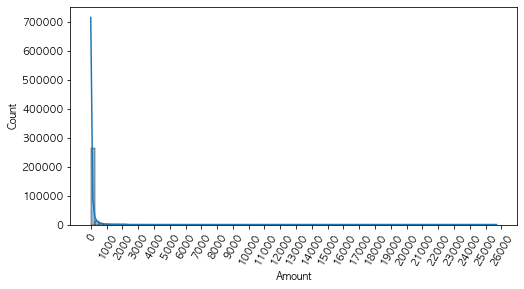

In [7]:
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [8]:
amount_n = np.log1p(card_df['Amount'])
card_df.insert(0, 'Amount_Scaled', amount_n)
card_df.drop(['Time', 'Amount'], axis=1, inplace=True)

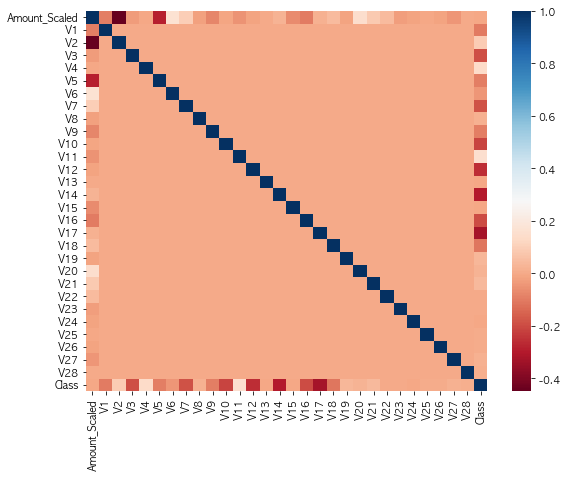

In [9]:
plt.figure(figsize=(9, 7))
sns.heatmap(card_df.corr(), cmap='RdBu')
plt.show()

In [10]:
x_features = card_df.iloc[:, :-1]
y_target = card_df.iloc[:, -1]
    
# train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

In [11]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [651]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE

In [652]:
### SMOTE 적용
smote = SMOTE(random_state=0)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199364, 29) (199364,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [653]:
lr_clf = LogisticRegression()
lgbm_clf = LGBMClassifier(n_estimators=5, num_leaves=32, n_jobs=-1, boost_from_average=False)

lr_clf.fit(x_train_over, y_train_over)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

confusion = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
auc_score = roc_auc_score(y_test, pred_proba)
    
print('오차 행렬\n', confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{3:.4f}'.format(accuracy, precision, recall, f1, auc_score))

lgbm_clf.fit(x_train_over, y_train_over)
pred = lgbm_clf.predict(x_test)
pred_proba = lgbm_clf.predict_proba(x_test)[:, 1]

confusion = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
auc_score = roc_auc_score(y_test, pred_proba)
    
print('오차 행렬\n', confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{3:.4f}'.format(accuracy, precision, recall, f1, auc_score))

오차 행렬
 [[83317  1978]
 [   15   133]]
정확도: 0.9767, 정밀도: 0.0630, 재현율: 0.8986, F1:0.1178, AUC:0.1178
[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
오차 행렬
 [[83738  1557]
 [   19   129]]
정확도: 0.9816, 정밀도: 0.0765, 재현율: 0.8716, F1:0.1407, AUC:0.1407


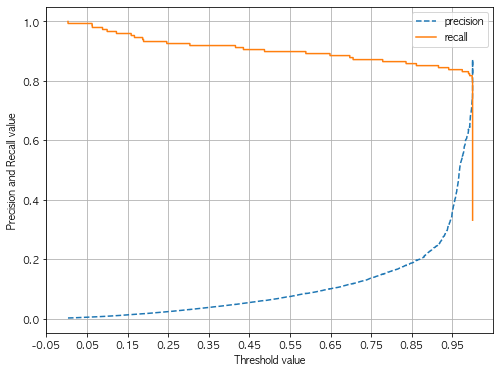

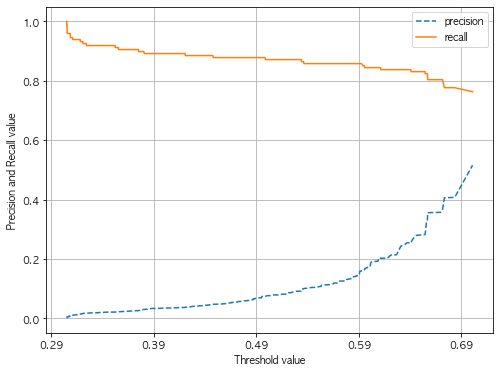

In [654]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1])
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(x_test)[:, 1])

### (2) Isolation Forest

In [655]:
card_df.head()

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,5.014760,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.305626,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,5.939276,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,4.824306,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,4.262539,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [656]:
from sklearn.preprocessing import StandardScaler

In [657]:
data_x = card_df.copy().drop(['Class'], axis=1)
data_y = card_df['Class'].copy()

feature_to_scale = data_x.columns
scaler = StandardScaler()
data_x.loc[:, feature_to_scale] = scaler.fit_transform(data_x[feature_to_scale])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, stratify=data_y)

In [658]:
from sklearn.ensemble import IsolationForest

In [659]:
isol = IsolationForest()
isol.fit(x_train)
pred = isol.predict(x_test)
pred = np.where(pred==1, 0, 1)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[82067  3228]
 [   29   119]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.80      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.88      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [660]:
train_score = isol.score_samples(x_train)
train_score = -1 * train_score

test_score = isol.score_samples(x_test)
test_score = -1 * test_score

In [661]:
precision, recall, thresholds = precision_recall_curve(y_train, train_score, pos_label=1)
f1 = 2 / (1/precision + 1/recall)
thre = round(thresholds[np.argmax(f1)], 4)

In [662]:
cutoff_f1max = thresholds[np.argmax(f1)]
cutoff_f1max

0.6308623369923213

In [663]:
f1.max()

0.24714434060228455

In [664]:
new_cont = sum(train_score >= cutoff_f1max) / len(train_score)
new_cont

0.003104873497722758

In [665]:
from itertools import product
from tqdm import tqdm

In [666]:
n_est = list(range(20, 201, 20))
max_s = list(range(100, 1001, 100))
items = [n_est, max_s]
params = list(product(*items))

In [667]:
f1_list = []
for p in tqdm(params) :
    model = IsolationForest(contamination=new_cont, n_estimators=p[0], max_samples=p[1], random_state=0)
    model.fit(x_train)
    pred = model.predict(x_test)
    pred = np.where(pred==1, 0, 1)
    f1_list.append(f1_score(y_test, pred, pos_label=1))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [27:51<00:00, 16.71s/it]


In [668]:
max_id = np.argmax(f1_list)

print(params[max_id])
print(f1_list[max_id])

(40, 200)
0.28915662650602414


In [669]:
isol = IsolationForest(contamination=new_cont, n_estimators=params[max_id][0], max_samples=params[max_id][1], random_state=0)
isol.fit(x_train)

pred = isol.predict(x_test)
pred = np.where(pred==1, 0, 1)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85088   207]
 [   88    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.22      0.41      0.29       148

    accuracy                           1.00     85443
   macro avg       0.61      0.70      0.64     85443
weighted avg       1.00      1.00      1.00     85443



In [670]:
train_score = isol.score_samples(x_train)
train_score = -1 * train_score

test_score = isol.score_samples(x_test)
test_score = -1 * test_score

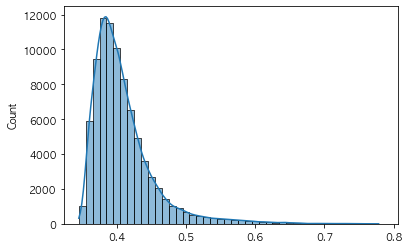

In [671]:
sns.histplot(test_score, kde=True, binwidth=0.01)
plt.show()

In [672]:
precision, recall, thresholds = precision_recall_curve(y_test, test_score, pos_label=1)
f1 = 2 / (1/precision + 1/recall)
thre = round(thresholds[np.argmax(f1)], 4)

In [673]:
cutoff_f1max = thresholds[np.argmax(f1)]
cutoff_f1max

0.6604607640494047

In [674]:
f1.max()

0.32996632996633

### (3) One-Class SVM

In [675]:
x_train0 = x_train[y_train==0]

In [676]:
from sklearn.svm import OneClassSVM

In [677]:
ocs = OneClassSVM(nu=0.1, gamma=0.1)
ocs.fit(x_train0)
pred = ocs.predict(x_test)
pred = np.where(pred==1, 0, 1) # -1, 1 ==> 1, 0

In [678]:
print(confusion_matrix(y_test, pred))
print('-'*50)
print(classification_report(y_test, pred))

[[76448  8847]
 [   14   134]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85295
           1       0.01      0.91      0.03       148

    accuracy                           0.90     85443
   macro avg       0.51      0.90      0.49     85443
weighted avg       1.00      0.90      0.94     85443



In [679]:
f1_score(y_test, pred)

0.029356994194325775

### (4) PCA

In [680]:
from sklearn.decomposition import PCA

In [681]:
pca = PCA(n_components=25, whiten=False) # components 개수 결정이 중요

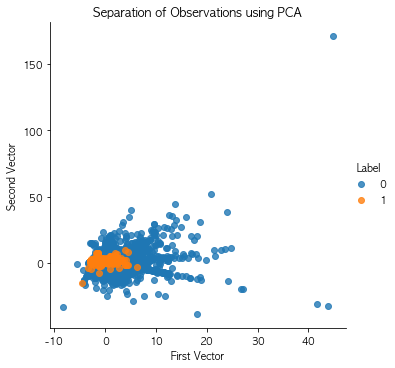

In [682]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit(x_test)

x_train_PCA = pca.fit_transform(x_train_scaled)
x_train_PCA = pd.DataFrame(data=x_train_PCA, index=x_train.index)

x_train_PCA_inverse = pca.inverse_transform(x_train_PCA)
x_train_PCA_original_inverse = scaler.inverse_transform(x_train_PCA_inverse)
x_train_PCA_original_inverse = pd.DataFrame(data=x_train_PCA_original_inverse, index=x_train.index)

temp_df = pd.DataFrame(data=x_train_PCA.loc[:, 0:1], index=x_train_PCA.index)
temp_df = pd.concat((temp_df, y_train), axis=1, join="inner")
temp_df.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=temp_df, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations using PCA")
plt.show()

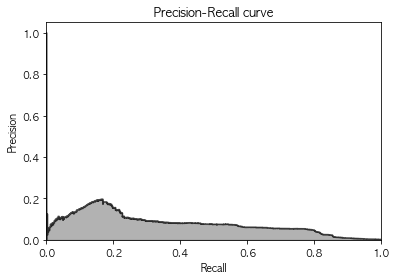

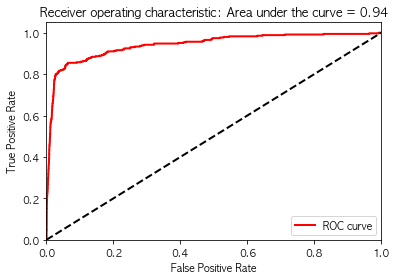

In [683]:
loss = np.sum((np.array(x_train) - np.array(x_train_PCA_original_inverse))**2, axis=1) # 원본 데이터와 복원 데이터의 차이를 loss로 계산
loss = pd.Series(data=loss, index=x_train.index)
anomaly_scores = (loss - np.min(loss))/(np.max(loss) - np.min(loss))

preds = pd.concat([y_train, anomaly_scores], axis=1)
preds.columns = ['true_label', 'anomaly_score']
precision, recall, thresholds = precision_recall_curve(preds['true_label'],preds['anomaly_score'])
    
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
    
plt.title('Precision-Recall curve')
fpr, tpr, thresholds = roc_curve(preds['true_label'], preds['anomaly_score'])
auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(auc_value))
plt.legend(loc="lower right")
plt.show()

### (5) DBSCAN
- 군집화 알고리즘 이후 군집 외 데이터를 이상치로 판단
- 새로운 데이터 예측은 불가능

In [12]:
from sklearn.neighbors import NearestNeighbors

In [13]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_test) ### 시간의 문제로 test set만 사용
distances, indices = nbrs.kneighbors(x_test)
 
#거리 변수는 데이터 세트의 모든 데이터 포인트에 대해 데이터 포인트와 가장 가까운 데이터 포인트 사이의 거리 배열을 포함
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

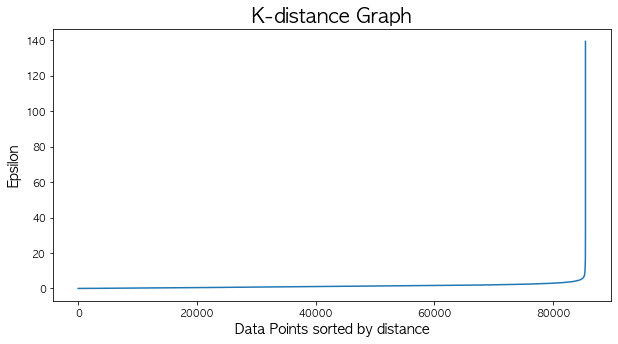

In [14]:
# Plotting K-distance Graph
# 최대 곡률 지점에서 eps 파라미터 결정
plt.figure(figsize=(10, 5))
plt.plot(distances)

plt.title('K-distance Graph', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
# Scale data first
# data_x는 앞서 scaled 된 데이터임
db = DBSCAN(eps=6, min_samples=10).fit(x_test)
labels = db.labels_

In [17]:
# 0: 양호, -1: Outlier
result = pd.DataFrame()
result["Class"] = y_test.copy()
result["labels"] = labels
result.labels = np.where(result.labels >=0, 0, result.labels) # 클래스 분류가 된 경우 Normal로 판단
result.loc[result["labels"]==-1, 'Class'].sum()

104

In [18]:
## CM을 그리기 위해서 -1을 Class와 같이 1로 변경
result.loc[result.labels==-1, "labels"] = 1
confusion_matrix(result.Class, result.labels)

array([[84603,   692],
       [   44,   104]])

In [19]:
accuracy = accuracy_score(result.Class, result.labels)
print("정확도:", accuracy)

precision = precision_score(result.Class, result.labels)
print("정밀도:", precision)

recall = recall_score(result.Class, result.labels)
print("재현율:", recall)

f1 = f1_score(result.Class, result.labels)
print("f1 점수:", f1)

정확도: 0.9913860702456608
정밀도: 0.1306532663316583
재현율: 0.7027027027027027
f1 점수: 0.22033898305084748


## Optimization

### (1) Linear Programming